# 0.5_ss_basis

In [1]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [2]:
from coding_the_matrix.vecutil import list2vec 

In [3]:
import itertools

In [4]:
itertools.permutations(range(2), 3)

In [5]:
L = [a for a in itertools.product([0, 1], [0, 1], [0, 1])]

In [6]:
corners = [list2vec(v) for v in L]

In [7]:
corners

[Vec(self.D, {}),
 Vec(self.D, {2: 1}),
 Vec(self.D, {1: 1}),
 Vec(self.D, {1: 1, 2: 1}),
 Vec(self.D, {0: 1}),
 Vec(self.D, {0: 1, 2: 1}),
 Vec(self.D, {0: 1, 1: 1}),
 Vec(self.D, {0: 1, 1: 1, 2: 1})]

In [8]:
def line_segment(pt1, pt2, samples=100):
    return [(i/samples)*pt1 + (1-i/samples)*pt2 for i in range(samples+1)]

In [9]:
segments = [
    (0, 1),
    (2, 3),
    (0, 2),
    (1, 3),
    (4, 5),
    (6, 7),
    (4, 6),
    (5, 7),
    (0, 4),
    (1, 5),
    (2, 6),
    (3, 7),
]

In [10]:
line_segments = [line_segment(corners[i], corners[j]) for i, j in segments]

In [11]:
pts = sum(line_segments, [])

In [12]:
def pixel(x): 
    """x is a camera coordinate"""
    return x[0], x[1]

In [13]:
def scale_down(x):
    """Scale down a point x to the screen"""
    return list2vec([x[0]/x[2], x[1]/x[2], 1])

In [14]:
camera_loc = list2vec([-1, -1, -8])

In [15]:
shifted_pts = [v - camera_loc for v in pts]


In [16]:
xpixels = 100
ypixels = 100
camera_basis = [
    list2vec([1/xpixels, 0, 0]),
    list2vec([0, 1/ypixels, 0]),
    list2vec([0, 0, 1]),
]

In [17]:
def vec2rep(basis, vector):
    """change vector to basis representation
    only works with the camera basis, making this work with any basis
    is equivalent of solving the inverse of basis.
    
    Proper:
        (a1, a2, a3) * rep = vector
        -> rep = (a1, a2, a3)^-1 * vector
    
    The below only works because for the camera basis, all expect 
    the diagnal is 0.
    """
    return (
        vector[0]/basis[0][0],
        vector[1]/basis[1][1],
        vector[2]/basis[2][2],
    )

In [18]:
camera_basis[0][0]

0.01

In [19]:
shifted_pts[0]

Vec(self.D, {0: 1.0, 1: 1.0, 2: 9.0})

In [20]:
shifted_pts[0][0]/camera_basis[0][0]

100.0

In [21]:
reps = [vec2rep(camera_basis, v) for v in shifted_pts]

In [22]:
in_camera_plane = [scale_down(u) for u in reps]

In [23]:
pixels = [pixel(u) for u in in_camera_plane]

In [24]:
from coding_the_matrix.plot import plot

<AxesSubplot:xlabel='x', ylabel='y'>

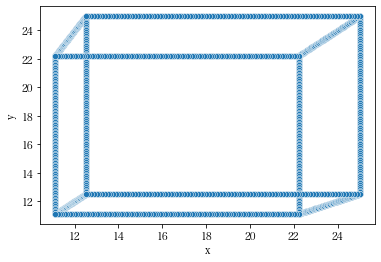

In [25]:
plot(pixels)

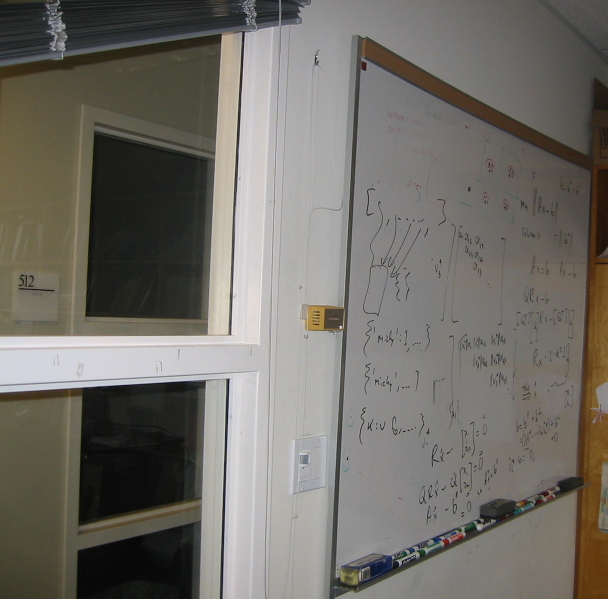

In [26]:
from IPython.display import Image
Image(filename='board.png') 

In [97]:
def move2board(y):
    """
    Args:
        y: a {y1, y2, y3} vector, the coordinate representation in whiteboard coordinates of a point q
            y3 is non zero
    Returns:
        a {y1, y2, y3} vector z, the coordinate representation in whiteboard coordinates of the point p 
        such that the line through the origin and q intersects with the whiteboard place a p. 
        by definition, y3 is 1
    """
    return Vec(y.D, {k: v/y['y3'] for k, v in y.f.items()}) 

In [98]:
y = Vec({'y1', 'y2', 'y3'}, {'y3': 318614.38179883955, 'y1': -171215.7664884135, 'y2': 52342.01319122613})

In [101]:
move2board(y)

Vec(self.D, {'y3': 1.0, 'y1': -0.537376139525655, 'y2': 0.16428013354485924})

In [28]:
from coding_the_matrix.Vec import Vec

In [29]:
def make_equations(x1, x2, w1, w2):
    """

    Returns:
        [u, v] consisting of 2 D-vectors u and v.
        - u.h = 0
        - v.h = 0
        $ u \dot h = 0 $ and $ v \dot h = 0 $
    """
    u = Vec(
        D,
        {
            ("y3", "x1"): w1 * x1,
            ("y3", "x2"): w1 * x2,
            ("y3", "x3"): w1,
            ("y1", "x1"): -x1,
            ("y1", "x2"): -x2,
            ("y1", "x3"): -1,
        },
    )
    v = Vec(
        D,
        {
            ("y3", "x1"): w2 * x1,
            ("y3", "x2"): w2 * x2,
            ("y3", "x3"): w2,
            ("y2", "x1"): -x1,
            ("y2", "x2"): -x2,
            ("y2", "x3"): -1,
        },
    )
    return [u, v]

In [30]:
R = {'y1', 'y2', 'y3'}
C = {'x1', 'x2', 'x3'}
D = {(y, x) for y, x in itertools.product(R, C)}

In [31]:
D

{('y1', 'x1'),
 ('y1', 'x2'),
 ('y1', 'x3'),
 ('y2', 'x1'),
 ('y2', 'x2'),
 ('y2', 'x3'),
 ('y3', 'x1'),
 ('y3', 'x2'),
 ('y3', 'x3')}

In [32]:
w = Vec(D, {('y1', 'x1'): 1})

In [33]:
from coding_the_matrix.Mat import Mat
from coding_the_matrix.matutil import rowdict2mat

In [117]:
scale = 100

In [34]:
L = rowdict2mat([
    *make_equations(358,  36, 0, 0),
    *make_equations(329, 597, 0, 1*scale),
    *make_equations(592, 157, 1*scale, 0),
    *make_equations(580, 483, 1*scale, 1*scale),
    w
], col_labels=D)

In [35]:
b = Vec(set(range(9)), {8: 1})

In [36]:
from coding_the_matrix.solve import solve

In [37]:
h = solve(L, b)

In [38]:
h

Vec(self.D, {('y3', 'x3'): 669.4762699006176, ('y1', 'x3'): -359.8609625668448, ('y1', 'x2'): 0.051693404634580824, ('y2', 'x3'): 110.02318074778255, ('y3', 'x1'): -0.721935681071003, ('y2', 'x2'): 0.7378180860600994, ('y3', 'x2'): -0.011690730864965306, ('y2', 'x1'): -0.38152131800543615, ('y1', 'x1'): 1.0})

In [39]:
L * h

Vec(self.D, {0: -1.1368683772161603e-13, 1: 2.842170943040401e-14, 2: 5.684341886080802e-14, 3: -1.1368683772161603e-13, 4: -2.2737367544323206e-13, 5: 4.263256414560601e-14, 6: -1.1368683772161603e-13, 8: 1.0})

In [40]:
D

{('y1', 'x1'),
 ('y1', 'x2'),
 ('y1', 'x3'),
 ('y2', 'x1'),
 ('y2', 'x2'),
 ('y2', 'x3'),
 ('y3', 'x1'),
 ('y3', 'x2'),
 ('y3', 'x3')}

In [41]:
H = Mat([sorted(R), sorted(C)], {k: h[k] for k in sorted(D)})

In [42]:
H

Mat(
	[['y1', 'y2', 'y3'], ['x1', 'x2', 'x3']], 
	{('y1', 'x1'): 1.0, ('y1', 'x2'): 0.051693404634580824, ('y1', 'x3'): -359.8609625668448, ('y2', 'x1'): -0.38152131800543615, ('y2', 'x2'): 0.7378180860600994, ('y2', 'x3'): 110.02318074778255, ('y3',...
)

In [43]:
from coding_the_matrix.image_mat_util import im2mat, file2mat, show

In [44]:
from PIL import Image
import numpy as np

In [45]:
im = Image.open("board.png")

In [70]:
board_color, board_loc = file2mat('board.png') # , rows=['x1', 'x2', 'x3'])

In [48]:
H

Mat(
	[['y1', 'y2', 'y3'], ['x1', 'x2', 'x3']], 
	{('y1', 'x1'): 1.0, ('y1', 'x2'): 0.051693404634580824, ('y1', 'x3'): -359.8609625668448, ('y2', 'x1'): -0.38152131800543615, ('y2', 'x2'): 0.7378180860600994, ('y2', 'x3'): 110.02318074778255, ('y3',...
)

In [71]:
board_color

Mat(
	[['r', 'g', 'b'], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (..., 
	{('r', (0, 0)): 41, ('r', (1, 0)): 42, ('r', (2, 0)): 42, ('r', (3, 0)): 45, ('r', (4, 0)): 45, ('r', (5, 0)): 48, ('r', (6, 0)): 52, ('r', (7, 0)): 54, ('r', (8, 0)): 57, ('r', (9, 0)): 60, ('r', (10...
)

In [72]:
board_loc

Mat(
	[['x', 'y', 'u'], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (..., 
	{('x', (0, 0)): 0, ('x', (0, 1)): 0, ('x', (0, 2)): 0, ('x', (0, 3)): 0, ('x', (0, 4)): 0, ('x', (0, 5)): 0, ('x', (0, 6)): 0, ('x', (0, 7)): 0, ('x', (0, 8)): 0, ('x', (0, 9)): 0, ('x', (0, 10)): 0, ...
)

100%|██████████| 364192/364192 [00:08<00:00, 43873.29it/s]


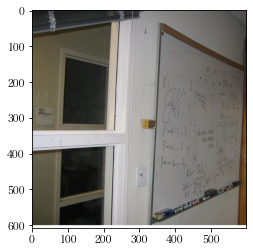

In [51]:
show(board_color, board_loc)

In [52]:
from coding_the_matrix.matutil import rename_row_domain

In [73]:
board_loc_renamed = rename_row_domain(board_loc, ['x1', 'x2', 'x3'])

In [74]:
board_loc_renamed

Mat(
	[['x1', 'x2', 'x3'], {(476, 78), (338, 144), (35, 335), (150, 93), (246, 555), (282, 212), (585, 21)..., 
	{('x1', (476, 78)): 78, ('x1', (338, 144)): 144, ('x1', (35, 335)): 335, ('x1', (150, 93)): 93, ('x1', (246, 555)): 555, ('x1', (282, 212)): 212, ('x1', (585, 21)): 21, ('x1', (58, 504)): 504, ('x1', ...
)

In [75]:
board_loc

Mat(
	[['x', 'y', 'u'], [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (..., 
	{('x', (0, 0)): 0, ('x', (0, 1)): 0, ('x', (0, 2)): 0, ('x', (0, 3)): 0, ('x', (0, 4)): 0, ('x', (0, 5)): 0, ('x', (0, 6)): 0, ('x', (0, 7)): 0, ('x', (0, 8)): 0, ('x', (0, 9)): 0, ('x', (0, 10)): 0, ...
)

In [76]:
y_pts = H * board_loc_renamed

In [78]:
H

Mat(
	[['y1', 'y2', 'y3'], ['x1', 'x2', 'x3']], 
	{('y1', 'x1'): 1.0, ('y1', 'x2'): 0.051693404634580824, ('y1', 'x3'): -359.8609625668448, ('y2', 'x1'): -0.38152131800543615, ('y2', 'x2'): 0.7378180860600994, ('y2', 'x3'): 110.02318074778255, ('y3',...
)

In [79]:
y_pts

Mat(
	[['y3', 'y1', 'y2'], {(476, 78), (338, 144), (35, 335), (150, 93), (246, 555), (282, 212), (585, 21)..., 
	{('y3', (476, 78)): 318614.38179883955, ('y3', (338, 144)): 226179.00879760363, ('y3', (35, 335)): 23189.809302631966, ('y3', (150, 93)): 100354.28877602216, ('y3', (246, 555)): 164290.47640182663, ('...
)

In [82]:
from coding_the_matrix.matutil import mat2coldict, coldict2mat

In [84]:
def mat_move2board(Y):
    """
    Args:
        Y: a Mat each column of which is  a'y1', 'y2', 'y3'-vector giving the 
        whiteboard coordinates of a point q
    Returns:
        a Mat each column of which is the correspoinding point in the whiteboard
        pane (the point of intersection witht the whiteboard plane of the line 
        through the origin and q)
    """
    coldict = mat2coldict(Y)
    to_board = {
        k: move2board(v) for k, v in coldict.items()
    }
    return coldict2mat(to_board)

In [102]:
Y_board = mat_move2board(y_pts)

In [104]:
Y_board

Mat(
	[{'y3', 'y1', 'y2'}, {(476, 78), (338, 144), (35, 335), (150, 93), (246, 555), (282, 212), (585, 21)..., 
	{('y3', (476, 78)): 1.0, ('y1', (476, 78)): -0.537376139525655, ('y2', (476, 78)): 0.16428013354485924, ('y3', (338, 144)): 1.0, ('y1', (338, 144)): -0.5371362899680198, ('y2', (338, 144)): 0.16417807...
)

In [105]:
set({'a': 'b'})

{'a'}

In [106]:
Y_board_new = rename_row_domain(Y_board, {'y1': 'x', 'y2': 'y', 'y3': 'u'})

In [107]:
Y_board_new

Mat(
	[['u', 'x', 'y'], {(476, 78), (338, 144), (35, 335), (150, 93), (246, 555), (282, 212), (585, 21), (..., 
	{('u', (476, 78)): 1.0, ('u', (338, 144)): 1.0, ('u', (35, 335)): 1.0, ('u', (150, 93)): 1.0, ('u', (246, 555)): 1.0, ('u', (282, 212)): 1.0, ('u', (585, 21)): 1.0, ('u', (58, 504)): 1.0, ('u', (493, ...
)

In [110]:
Y_board_new.min

-63.11137383815643

In [111]:
Y_board_new.max

1.0766200630227383

In [112]:
board_color

Mat(
	[['r', 'g', 'b'], [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (..., 
	{('r', (0, 0)): 41, ('r', (1, 0)): 42, ('r', (2, 0)): 42, ('r', (3, 0)): 45, ('r', (4, 0)): 45, ('r', (5, 0)): 48, ('r', (6, 0)): 52, ('r', (7, 0)): 54, ('r', (8, 0)): 57, ('r', (9, 0)): 60, ('r', (10...
)

In [113]:
from coding_the_matrix.image_mat_util import translation

In [115]:
translation(60, 60)

Mat(
	[['x', 'y', 'u'], ['x', 'y', 'u']], 
	{('x', 'x'): 1, ('x', 'y'): 0, ('x', 'u'): 60, ('y', 'x'): 0, ('y', 'y'): 1, ('y', 'u'): 60, ('u', 'x'): 0, ('u', 'y'): 0, ('u', 'u'): 1}
)

100%|██████████| 364192/364192 [00:08<00:00, 44132.47it/s]


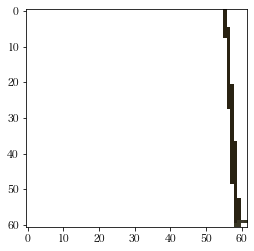

In [116]:
show(board_color, Y_board_new, loc_mat=translation(60, 60))

In [103]:
show?

Signature: show(colors, locations, col_mat=None, loc_mat=None)
Docstring: Can take lists for loc_mat and col_mat
File:      ~/github.com/banbiossa/coding-the-matrix/coding_the_matrix/image_mat_util.py
Type:      function


In [86]:
y_pts

Mat(
	[['y3', 'y1', 'y2'], {(476, 78), (338, 144), (35, 335), (150, 93), (246, 555), (282, 212), (585, 21)..., 
	{('y3', (476, 78)): 318614.38179883955, ('y3', (338, 144)): 226179.00879760363, ('y3', (35, 335)): 23189.809302631966, ('y3', (150, 93)): 100354.28877602216, ('y3', (246, 555)): 164290.47640182663, ('...
)

In [87]:
coldict = mat2coldict(y_pts)
coldict

{(476,
  78): Vec(self.D, {'y3': 318614.38179883955, 'y1': -171215.7664884135, 'y2': 52342.01319122613}),
 (338,
  144): Vec(self.D, {'y3': 226179.00879760363, 'y1': -121488.95365418891, 'y2': 37133.63384104378}),
 (35,
  335): Vec(self.D, {'y3': 23189.809302631966, 'y1': -12260.081996434934, 'y2': 3723.7395027266284}),
 (150,
  93): Vec(self.D, {'y3': 100354.28877602216, 'y1': -53886.09269162209, 'y2': 16468.733447678936}),
 (246,
  555): Vec(self.D, {'y3': 164290.47640182663, 'y1': -87970.74509803919, 'y2': 26854.69595054755}),
 (282,
  212): Vec(self.D, {'y3': 188639.24605685624, 'y1': -101268.7397504456, 'y2': 30946.392269543587}),
 (585,
  21): Vec(self.D, {'y3': 391628.44555182796, 'y1': -210497.61140819956, 'y2': 64356.28660786074}),
 (58,
  504): Vec(self.D, {'y3': 38465.75638024517, 'y1': -20367.884135472363, 'y2': 6189.795557182708}),
 (144,
  278): Vec(self.D, {'y3': 96203.87305562032, 'y1': -51541.926916221026, 'y2': 15738.012919361236}),
 (92,
  88): Vec(self.D, {'y3': 615

In [ ]:
H.D

In [ ]:
board_loc.D